In [21]:
import numpy as np
import matplotlib.pyplot as plt
import mne


# Adding Experiment Time Annotations

## Using [`mne.Annotations`](https://mne.tools/stable/generated/mne.Annotations.html)

**Exercises**: 

Create an Annotations object from scratch using `mne.Annotations()`, describing 5 epochs in your data for two different events:
  - *"StimApp"*: Happened at 3 secs, 5 secs, and 7 secs, for 0.3 seconds in duration.
  - *"ButtonPressed"*: Happened at 3.5 secs and 5.2 secs, for 0.6 seconds in duration.

Indexing: Get the third annotation from your annotations

Slicing: Get the first three annotations from your annotations

`Annotations.append()`: add another ButtonPressed event at 7.7 secs for 0.1 seconds in duration

`Annotations.rename()`: rename the 'StimApp' label to 'StimAppeared'

`Annotations.to_data_frame()`: export the Annotations object to a data frame

`Annotations.save('annots.csv')`: Save the Annotations to a CSV file

`mne.read_annotations()`: Read the CSV file back in as an Annotations object

#### Associating Experimental Annotations to an Electrophysiological Dataset

`Raw.set_annotations()`: Create a Raw dataset with a one channel of a sine wave for 10 seconds, then add the annotations to it.

Plot the raw traces.  Do you see the annotations?

Plot the raw traces in interactive mode, then press the 'a' key to activate 'Annotation' mode.  Uses it to create five new "BAD_" annotations, anywhere you wish.  This is quite useful for interactively marking artifacts, sleep states, eppileptic seizures, etc, in the data.  Afterwards, show that the annotations have been entered into the Raw dataset with `Raw.annotations`.

Save the raw data to a file

## Events

Examples

In [106]:
num = np.arange(10)
onsets = np.arange(0, 1000, 100)
prev = np.zeros_like(num)
values = num % 3 + 1
events = np.array([onsets, prev, values]).T
events
events

array([[  0,   0,   1],
       [100,   0,   2],
       [200,   0,   3],
       [300,   0,   1],
       [400,   0,   2],
       [500,   0,   3],
       [600,   0,   1],
       [700,   0,   2],
       [800,   0,   3],
       [900,   0,   1]])

In [107]:
mne.write_events('events.eve', events)

In [108]:
mne.read_events('events.eve')

array([[  0,   0,   1],
       [100,   0,   2],
       [200,   0,   3],
       [300,   0,   1],
       [400,   0,   2],
       [500,   0,   3],
       [600,   0,   1],
       [700,   0,   2],
       [800,   0,   3],
       [900,   0,   1]])

In [89]:
%matplotlib inline

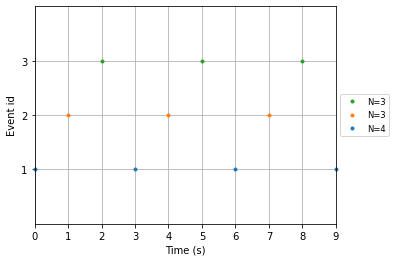

In [91]:
mne.viz.plot_events(events, sfreq=100);

In [75]:
raw.times[:10]

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

Creating RawArray with float64 data, n_channels=1, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.


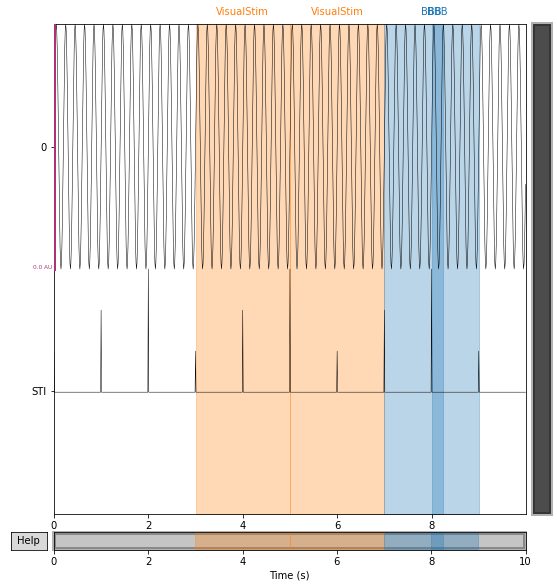

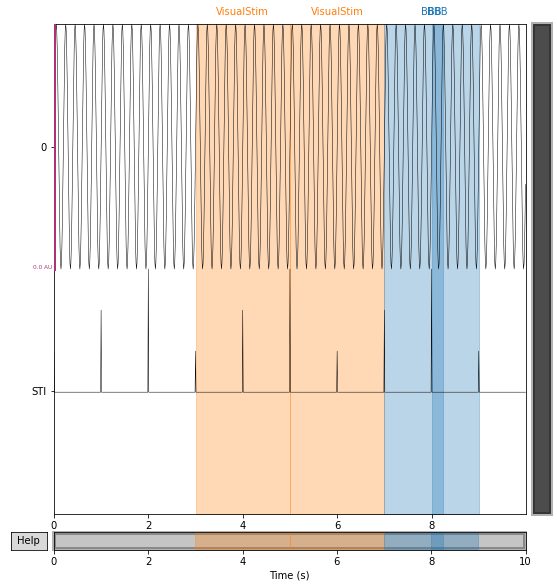

In [97]:
stim_data = np.zeros_like(raw.times)
stim_raw = mne.io.RawArray([stim_data], mne.create_info(['STI'], raw.info['sfreq'], ['stim']))
raw2 = raw.copy()
raw2.add_channels([stim_raw])
raw2.add_events(events=events, stim_channel='STI')
raw2.plot()
# raw.add_events?

In [98]:
mne.find_events(raw2, stim_channel='STI')

Trigger channel has a non-zero initial value of 1 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
9 events found
Event IDs: [1 2 3]


array([[100,   0,   2],
       [200,   0,   3],
       [300,   0,   1],
       [400,   0,   2],
       [500,   0,   3],
       [600,   0,   1],
       [700,   0,   2],
       [800,   0,   3],
       [900,   0,   1]], dtype=int64)

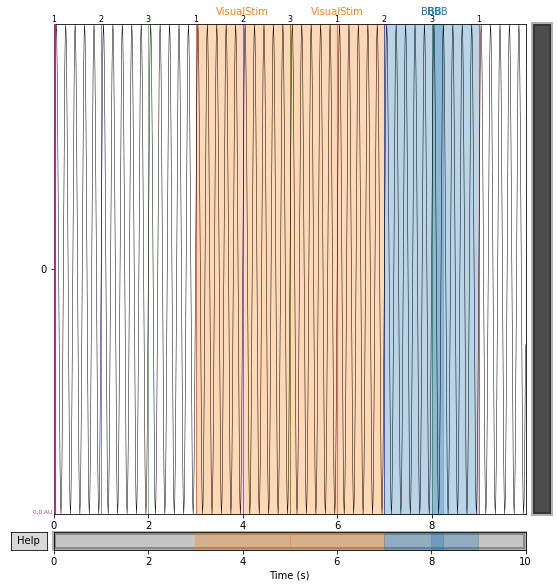

In [117]:
raw.plot(events=events, event_color={1: 'r', 2: 'b', 3: 'g'});

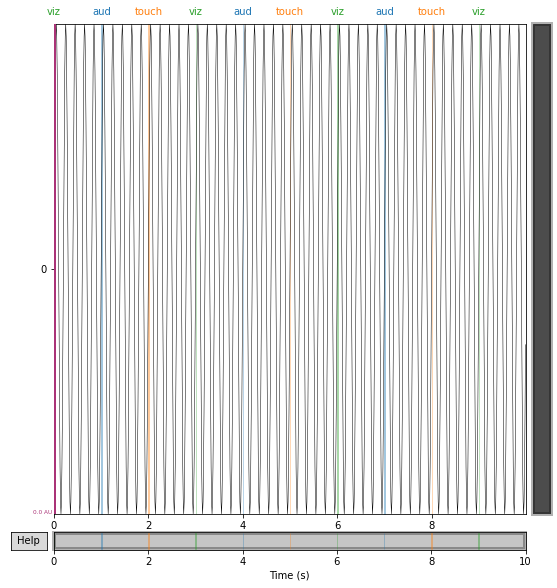

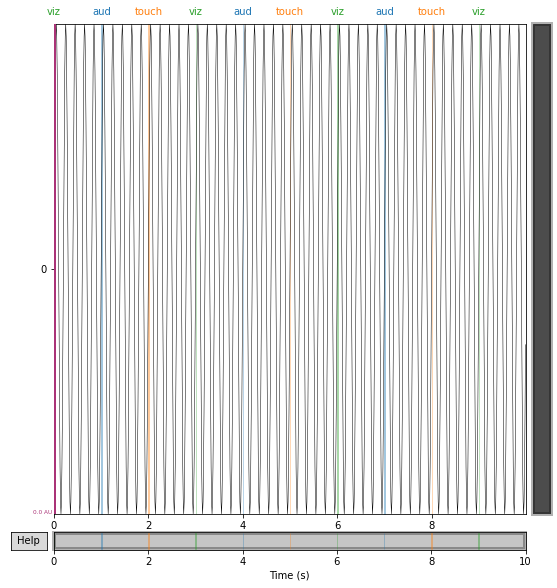

In [104]:
mapping = {1: 'viz', 2: 'aud', 3: 'touch'}
annots2 = mne.annotations_from_events(events=events, event_desc=mapping, sfreq=100,)
raw.copy().set_annotations(annots2).plot()


In [123]:
mne.events_from_annotations(raw, )

Used Annotations descriptions: ['BBB', 'VisualStim']


(array([[300,   0,   2],
        [500,   0,   2],
        [700,   0,   1],
        [800,   0,   1]]),
 {'BBB': 1, 'VisualStim': 2})

### Epochs

In [131]:
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.5, baseline=(-0.3, -0.1))
epochs

Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,10
Events,1: 42: 33: 3
Time range,-0.300 – 0.500 sec
Baseline,-0.300 – -0.100 sec


In [132]:
print(epochs)

<Epochs |  10 events (good & bad), -0.3 - 0.5 sec, baseline -0.3 – -0.1 sec, ~6 kB, data not loaded,
 '1': 4
 '2': 3
 '3': 3>


In [133]:
epochs.event_id

{'1': 1, '2': 2, '3': 3}

In [144]:
mapping = {'viz': 1, 'aud': 2, 'touch': 3}
epochs = mne.Epochs(raw, events, tmin=-0.3, tmax=0.5, baseline=(-0.3, -0.1), event_id=mapping)
epochs

Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,10
Events,aud: 3touch: 3viz: 4
Time range,-0.300 – 0.500 sec
Baseline,-0.300 – -0.100 sec


In [145]:
epochs['viz']

Number of events,4
Events,viz: 4
Time range,-0.300 – 0.500 sec
Baseline,-0.300 – -0.100 sec


In [147]:
epochs[['viz', 'touch']]

Number of events,7
Events,touch: 3viz: 4
Time range,-0.300 – 0.500 sec
Baseline,-0.300 – -0.100 sec


In [149]:
epochs[0:3]

Number of events,3
Events,aud: 1touch: 1viz: 1
Time range,-0.300 – 0.500 sec
Baseline,-0.300 – -0.100 sec


In [153]:
epochs.to_data_frame().head()

Loading data for 9 events and 81 original time points ...


,time,condition,epoch,0
0,-300,aud,1,8.572528e-16
1,-290,aud,1,-3.090170e-01
2,-280,aud,1,-5.877853e-01
3,-270,aud,1,-8.090170e-01
4,-260,aud,1,-9.510565e-01


In [155]:
next(iter(epochs))

array([[ 8.57252759e-16, -3.09016994e-01, -5.87785252e-01,
        -8.09016994e-01, -9.51056516e-01, -1.00000000e+00,
        -9.51056516e-01, -8.09016994e-01, -5.87785252e-01,
        -3.09016994e-01, -9.79717439e-16,  3.09016994e-01,
         5.87785252e-01,  8.09016994e-01,  9.51056516e-01,
         1.00000000e+00,  9.51056516e-01,  8.09016994e-01,
         5.87785252e-01,  3.09016994e-01,  1.10218212e-15,
        -3.09016994e-01, -5.87785252e-01, -8.09016994e-01,
        -9.51056516e-01, -1.00000000e+00, -9.51056516e-01,
        -8.09016994e-01, -5.87785252e-01, -3.09016994e-01,
        -1.22464680e-15,  3.09016994e-01,  5.87785252e-01,
         8.09016994e-01,  9.51056516e-01,  1.00000000e+00,
         9.51056516e-01,  8.09016994e-01,  5.87785252e-01,
         3.09016994e-01, -2.20560220e-15, -3.09016994e-01,
        -5.87785252e-01, -8.09016994e-01, -9.51056516e-01,
        -1.00000000e+00, -9.51056516e-01, -8.09016994e-01,
        -5.87785252e-01, -3.09016994e-01, -1.46957616e-1

In [159]:
for e in epochs.iter_evoked():
    print(e)
# next(epochs.iter_evoked())

<Evoked | '2' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '3' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '1' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '2' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '3' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '1' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '2' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '3' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>
<Evoked | '1' (average, N=1), -0.3 – 0.5 sec, baseline off, 1 ch, ~7 kB>


Loading data for 9 events and 81 original time points ...
Loading data for 9 events and 81 original time points ...


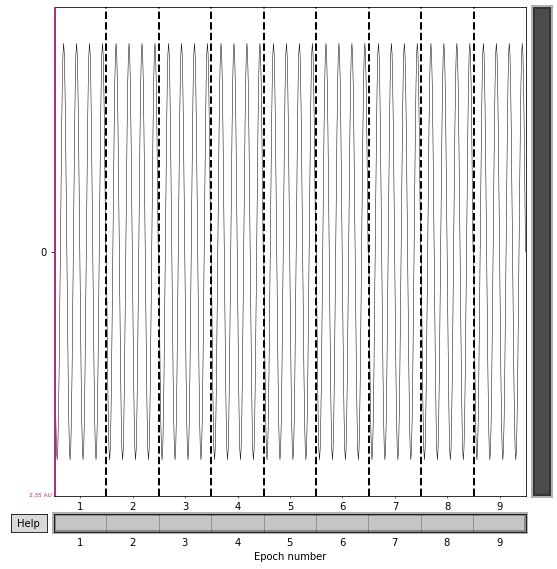

In [164]:
epochs.plot(picks='all');

Loading data for 9 events and 81 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


<ipython-input-166-35c41124bb60>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd(picks='all');


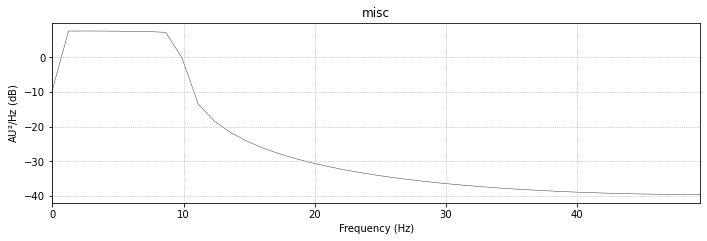

In [166]:
epochs.plot_psd(picks='all');

In [ ]:
epochs.plot_image(picks='all');  # only works if more than 1 channel

## Evoked

In [170]:
evoked = epochs.average(picks='all')
evoked

<Evoked | '0.33 × viz + 0.33 × aud + 0.33 × touch' (average, N=9), -0.3 – 0.5 sec, baseline -0.3 – -0.1 sec, 1 ch, ~7 kB>

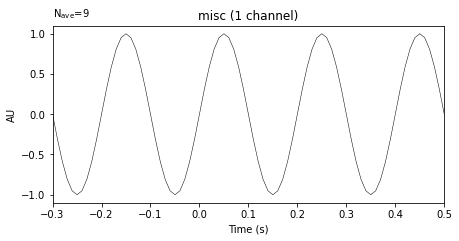

In [171]:
evoked.plot();

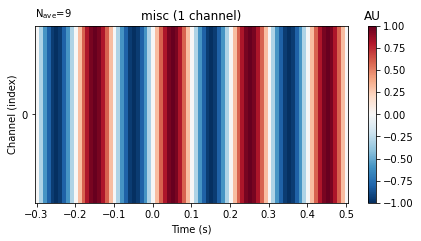

In [175]:
evoked.plot_image();

In [183]:
epochs['viz'].average(picks='all')

<Evoked | 'viz' (average, N=3), -0.3 – 0.5 sec, baseline -0.3 – -0.1 sec, 1 ch, ~7 kB>

<ipython-input-185-b80aae59433f>:1: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


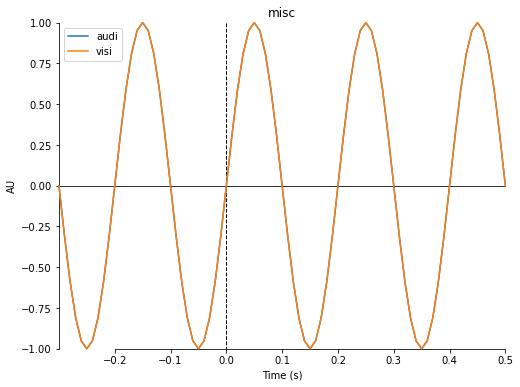

[<Figure size 576x432 with 1 Axes>]

In [185]:
mne.viz.plot_compare_evokeds(
    {
        'audi': epochs['aud'].average(picks='all'), 
        'visi': epochs['viz'].average(picks='all')
    }, 
    picks='misc',
)


In [176]:
aud_evoked = epochs['aud']
aud_evoked

Number of events,3
Events,aud: 3
Time range,-0.300 – 0.500 sec
Baseline,-0.300 – -0.100 sec


In [ ]:
aud_evoked.plot_joint(picks='eeg')  # if montage
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')  # if montage

In [ ]:
evoked_diff = mne.combine_evoked([aud_evoked, vis_evoked], weights=[1, -1])
evoked_diff.pick_types(meg='mag').plot_topo(color='r', legend=False)

## Further Reading
  - Annotation Objects: https://mne.tools/stable/auto_tutorials/raw/30_annotate_raw.html
  - Event Objects: https://mne.tools/stable/auto_tutorials/raw/20_event_arrays.html
  - Epoch Visualization: https://mne.tools/stable/auto_tutorials/epochs/20_visualize_epochs.html#tut-visualize-epochs
  - Evoked Objects: https://mne.tools/stable/auto_tutorials/evoked/10_evoked_overview.html